# Image Fill by AutoEncoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import tensorflow as tf
import math
from sklearn import model_selection
import keras

from keras import layers
from keras import models
from keras import Model
from keras.datasets import mnist
from keras import backend as K
from keras import metrics
from keras import optimizers

K.tensorflow_backend._get_available_gpus()

# The Function used to plot the original image and the predicted image 
def Plot_Img(n,images,fig_w,fig_h):
    # n is how many digits we will display//
    plt.figure(figsize=(fig_w, fig_h))
    for i in range(n):
        # display images
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
    
# The Function used to remove the middle square of the image
def Img_incomp(imgs1,imgs2,start=9,end=22):
    n = imgs1.shape[0]
    patches = []
    for i in range(n):
        a = imgs2[i][start:end,start:end,:]
        patches.append(a)
        imgs1[i][start:end,start:end,:] = 0
    return imgs1,patches

h_dim = 1024
batch_size = 50
height = 32
width = 32
channels = 3

Using TensorFlow backend.


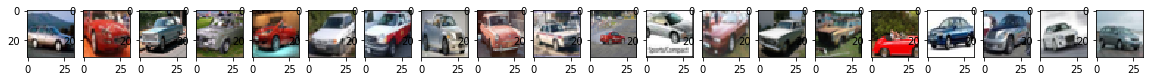

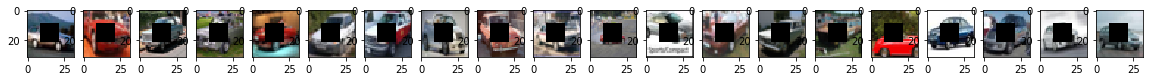

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train[y_train.flatten() == 1]
x_test = x_test[y_test.flatten() == 1]

# Normalize the pixels to 0 and 1 range
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

(x_tra,y_tra),(x_te,y_te) = keras.datasets.cifar10.load_data()
x_tra = x_tra[y_tra.flatten() == 1]
x_te = x_te[y_te.flatten() == 1]

# Normalize the pixels to 0 and 1 range
x_tra = x_tra.astype('float32') / 255.
x_te = x_te.astype('float32') / 255.

# Modfied training and testing imgs
x_train,x_train_patches = Img_incomp(x_train,x_tra)
x_test,x_test_patches = Img_incomp(x_test,x_te)
x_train_patches = np.array(x_train_patches)
x_test_patches = np.array(x_test_patches)

# Plot some examples
Plot_Img(20,x_tra,20,10)
Plot_Img(20,x_train,20,10)
plt.show()

## AutoEncoder to reconsturct the whole image

In [4]:
# Input
full_Input = layers.Input(batch_shape=(batch_size,height,width,channels))

# Encoder
full_l1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(full_Input)
full_l1 = layers.BatchNormalization()(full_l1)
full_l2 = layers.Conv2D(64,(3,3),activation='relu',strides=2,padding='same')(full_l1)
full_l2 = layers.BatchNormalization()(full_l2)
full_l3 = layers.Conv2D(128,(3,3),activation='relu',strides=2,padding='same')(full_l2)
full_l3 = layers.BatchNormalization()(full_l3)
full_l4 = layers.Conv2D(256,(3,3),activation='relu',strides=2,padding='same')(full_l3)
full_l4 = layers.BatchNormalization()(full_l4)
full_l5 = layers.Conv2D(h_dim,(3,3),activation='relu',strides=2)(full_l4)
full_encoder = Model(full_Input,full_l5)

# Decoder
full_d1 = layers.Conv2DTranspose(256,(3,3),activation='relu',strides=4,padding='same')(full_l5)
full_d2 = layers.Conv2DTranspose(128,(3,3),activation='relu',strides=2,padding='same')(full_d1)
full_d3 = layers.Conv2DTranspose(64,(3,3),activation='relu',strides=2,padding='same')(full_d2)
full_d4 = layers.Conv2DTranspose(3,(3,3),activation='sigmoid',strides=2,padding='same')(full_d3)
full_ae = Model(full_Input,full_d4)
full_ae.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (50, 32, 32, 3)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (50, 32, 32, 32)          896       
_________________________________________________________________
batch_normalization_1 (Batch (50, 32, 32, 32)          128       
_________________________________________________________________
conv2d_3 (Conv2D)            (50, 16, 16, 64)          18496     
_________________________________________________________________
batch_normalization_2 (Batch (50, 16, 16, 64)          256       
_________________________________________________________________
conv2d_4 (Conv2D)            (50, 8, 8, 128)           73856     
_________________________________________________________________
batc

In [6]:
full_ae_opt = optimizers.Adam(0.0005,0.5)
full_ae.compile(optimizer=full_ae_opt, loss='mean_squared_error')
full_ae.fit(x_train,x_tra,epochs=100,batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0433
Epoch 2/100
5000/5000 [==============================] - 2s 409us/step - loss: 0.0284
Epoch 3/100
5000/5000 [==============================] - 2s 410us/step - loss: 0.0246
Epoch 4/100
5000/5000 [==============================] - 2s 408us/step - loss: 0.0224
Epoch 5/100
5000/5000 [==============================] - 2s 409us/step - loss: 0.0209
Epoch 6/100
5000/5000 [==============================] - 2s 409us/step - loss: 0.0199
Epoch 7/100
5000/5000 [==============================] - 2s 409us/step - loss: 0.0190
Epoch 8/100
5000/5000 [==============================] - 2s 409us/step - loss: 0.0181
Epoch 9/100
5000/5000 [==============================] - 2s 408us/step - loss: 0.0173
Epoch 10/100
5000/5000 [==============================] - 2s 409us/step - loss: 0.0167
Epoch 11/100
5000/5000 [==============================] - 2s 408us/step - loss: 0.0162
Epoch 

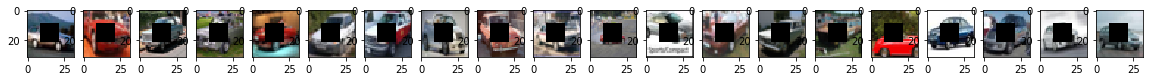

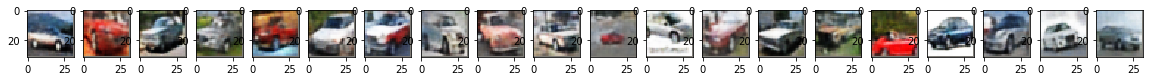

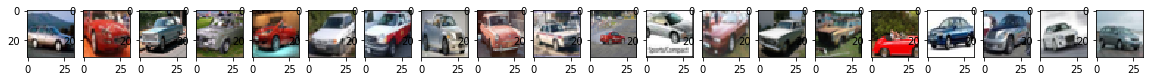

In [9]:
full_fill_train = full_ae.predict(x_train,batch_size=batch_size)
Plot_Img(20,x_train,20,10)
Plot_Img(20,full_fill_train,20,10)
Plot_Img(20,x_tra,20,10)
plt.show()

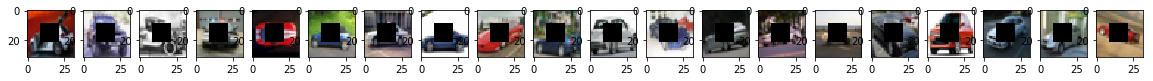

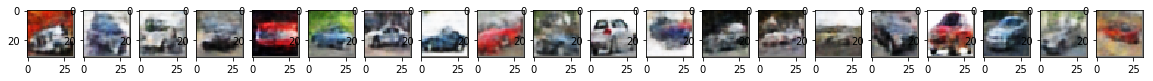

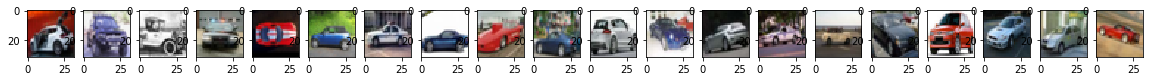

In [10]:
full_fill_test = full_ae.predict(x_test,batch_size=batch_size)
Plot_Img(20,x_test,20,10)
Plot_Img(20,full_fill_test,20,10)
Plot_Img(20,x_te,20,10)
plt.show()

## AutoEncoder to reconstruct the missing patches

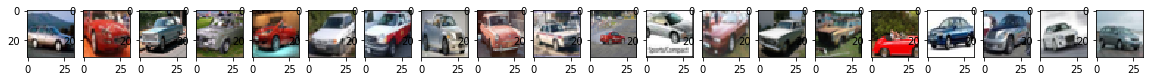

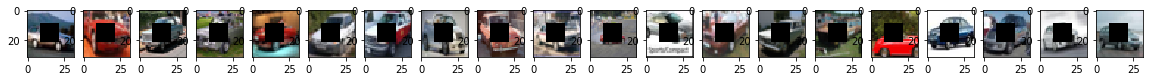

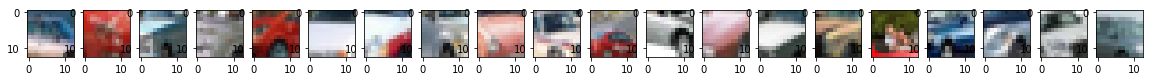

In [12]:
(x_train2,y_train2),(x_test2,y_test2) = keras.datasets.cifar10.load_data()
x_train2 = x_train2[y_train2.flatten() == 1]
x_test2 = x_test2[y_test2.flatten() == 1]

# Normalize the pixels to 0 and 1 range
x_train2 = x_train2.astype('float32') / 255.
x_test2 = x_test2.astype('float32') / 255.

# Modfied training and testing imgs
x_train2,x_train_patches2 = Img_incomp(x_train2,x_tra,start=7,end=24)
x_test2,x_test_patches2 = Img_incomp(x_test2,x_te,start=7,end=24)
x_train_patches2 = np.array(x_train_patches2)
x_test_patches2 = np.array(x_test_patches2)

# Plot some examples
Plot_Img(20,x_tra,20,10)
Plot_Img(20,x_train,20,10)
Plot_Img(20,x_train_patches,20,10)
plt.show()

In [18]:
# Input
Input = layers.Input(batch_shape=(batch_size,height,width,channels))

# Encoder
l1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(Input)
l1 = layers.BatchNormalization()(l1)
l2 = layers.Conv2D(64,(3,3),activation='relu',strides=2,padding='same')(l1)
l2 = layers.BatchNormalization()(l2)
l3 = layers.Conv2D(128,(3,3),activation='relu',strides=2,padding='same')(l2)
l3 = layers.BatchNormalization()(l3)
l4 = layers.Conv2D(256,(3,3),activation='relu',strides=2,padding='same')(l3)
l4 = layers.BatchNormalization()(l4)
l5 = layers.Conv2D(h_dim,(3,3),activation='relu',strides=2)(l4)
encoder = Model(Input,l5)

# Decoder
d1 = layers.Conv2DTranspose(256,(3,3),activation='relu',strides=4)(l5)
d2 = layers.Conv2DTranspose(128,(3,3),activation='relu',strides=2)(d1)
d3 = layers.Conv2DTranspose(64,(3,3),activation='relu')(d2)
d4 = layers.Conv2DTranspose(64,(3,3),activation='relu')(d3)
d5 = layers.Conv2DTranspose(64,(3,3),activation='relu')(d4)
d6 = layers.Conv2DTranspose(3,(3,3),activation='sigmoid')(d5)
ae = Model(Input,d6)
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (50, 32, 32, 3)           0         
_________________________________________________________________
conv2d_22 (Conv2D)           (50, 32, 32, 32)          896       
_________________________________________________________________
batch_normalization_17 (Batc (50, 32, 32, 32)          128       
_________________________________________________________________
conv2d_23 (Conv2D)           (50, 16, 16, 64)          18496     
_________________________________________________________________
batch_normalization_18 (Batc (50, 16, 16, 64)          256       
_________________________________________________________________
conv2d_24 (Conv2D)           (50, 8, 8, 128)           73856     
_________________________________________________________________
batch_normalization_19 (Batc (50, 8, 8, 128)           512       
__________

In [19]:
ae_opt = optimizers.Adam(0.0005,0.5)
ae.compile(optimizer=ae_opt, loss='mean_squared_error')
ae.fit(x_train,x_train_patches2,epochs=100,batch_size=batch_size)

Epoch 1/100
5000/5000 [==============================] - 4s 766us/step - loss: 0.0496
Epoch 2/100
5000/5000 [==============================] - 2s 408us/step - loss: 0.0379
Epoch 3/100
5000/5000 [==============================] - 2s 412us/step - loss: 0.0340
Epoch 4/100
5000/5000 [==============================] - 2s 417us/step - loss: 0.0315
Epoch 5/100
5000/5000 [==============================] - 2s 412us/step - loss: 0.0299
Epoch 6/100
5000/5000 [==============================] - 2s 420us/step - loss: 0.0282
Epoch 7/100
5000/5000 [==============================] - 2s 425us/step - loss: 0.0269
Epoch 8/100
5000/5000 [==============================] - 2s 431us/step - loss: 0.0258
Epoch 9/100
5000/5000 [==============================] - 2s 431us/step - loss: 0.0246
Epoch 10/100
5000/5000 [==============================] - 2s 430us/step - loss: 0.0237
Epoch 11/100
5000/5000 [==============================] - 2s 427us/step - loss: 0.0231
Epoch 12/100
5000/5000 [============================

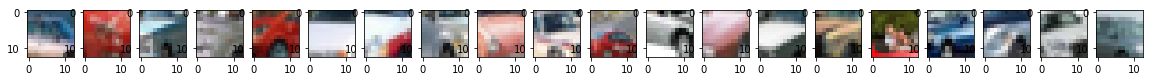

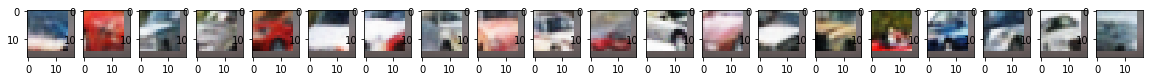

In [20]:
fill_train = ae.predict(x_train,batch_size=batch_size)
Plot_Img(20,x_train_patches,20,10)
Plot_Img(20,fill_train,20,10)
plt.show()

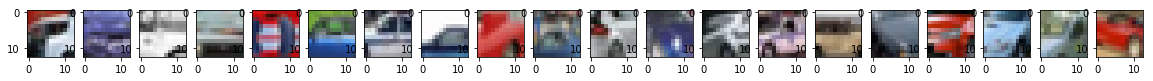

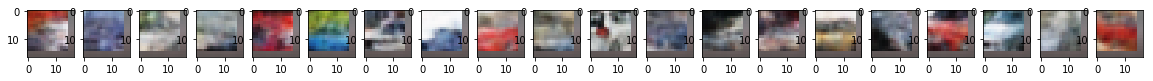

In [21]:
fill_test = ae.predict(x_test,batch_size=batch_size)
Plot_Img(20,x_test_patches,20,10)
Plot_Img(20,fill_test,20,10)
plt.show()